# Réduction de Dimension et Visualisation du PCA et t-sne

## Contexte

L'idée est de visualiser la distribution des titres des Films et séries sur Netflix dans un espace réduit afin de comprendre les relations entre différents titres basés sur les caractéristiques suivantes :
- release_year, 
- runtime, 
- imdb_score, 
- tmdb_score, 
- tmdb_popularity, 
- type

In [2]:
import pandas as pd

df_titles = pd.read_csv('../data/titles.csv', index_col='id')

df_titles.head()


,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,,,
ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

features = ['release_year', 'runtime', 'imdb_score', 'tmdb_score', 'tmdb_popularity', 'type']
pca_tsne_data = df_titles[features]
# Préparation des données
# Imputation des valeurs manquantes pour les caractéristiques numériques
# Encodage One-Hot pour la caractéristique catégorielle ('type')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['release_year', 'runtime', 'imdb_score', 'tmdb_score', 'tmdb_popularity']),
        ('cat', OneHotEncoder(), ['type'])
    ])
prepared_data = preprocessor.fit_transform(pca_tsne_data[features])


# Normalisation des données

Les méthodes de réduction de dimension fonctionnent mieux lorsque les données sont normalisées.

In [10]:
# Normalisation des données
scaler = StandardScaler()
normalized_data = scaler.fit_transform(prepared_data)


# 2. Réduction de Dimension
## PCA
La PCA est utilisée pour réduire la dimensionnalité tout en préservant autant que possible la variance (dispersion) des données.

In [11]:
from sklearn.decomposition import PCA

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)


## T-SNE

In [12]:
from sklearn.manifold import TSNE

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(normalized_data)


/var/folders/rr/1wkhb1792q74zlzfgv1dp96c0000gn/T/ipykernel_91005/1066385408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_tsne_data['PCA1'] = pca_data[:, 0]
/var/folders/rr/1wkhb1792q74zlzfgv1dp96c0000gn/T/ipykernel_91005/1066385408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_tsne_data['PCA2'] = pca_data[:, 1]
/var/folders/rr/1wkhb1792q74zlzfgv1dp96c0000gn/T/ipykernel_91005/1066385408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

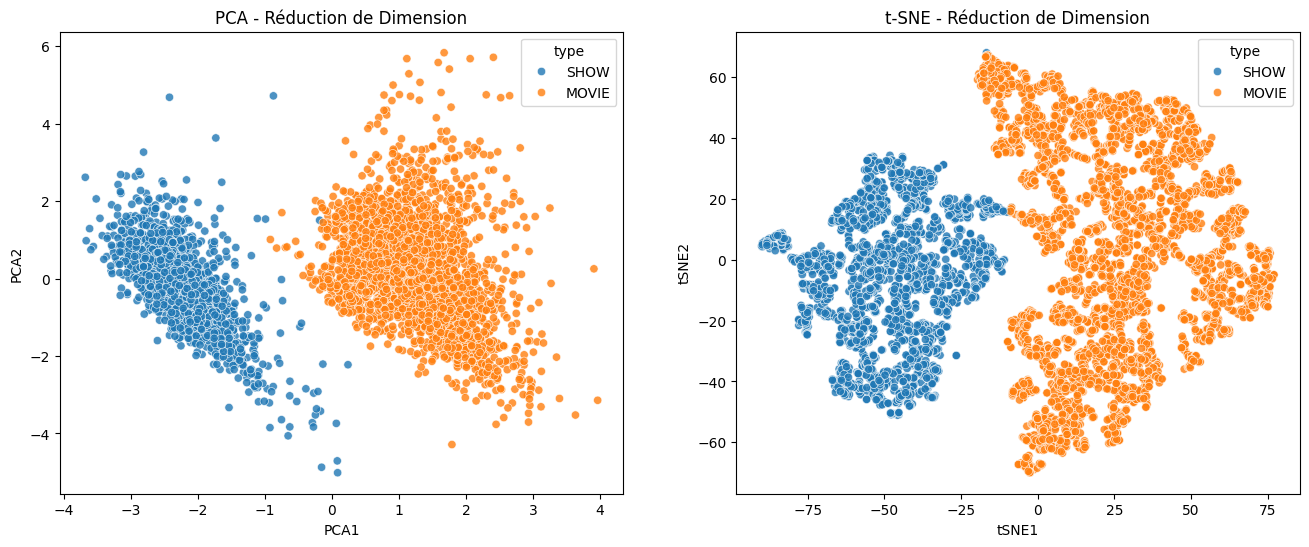

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Ajout des résultats dans le DataFrame
pca_tsne_data['PCA1'] = pca_data[:, 0]
pca_tsne_data['PCA2'] = pca_data[:, 1]
pca_tsne_data['tSNE1'] = tsne_data[:, 0]
pca_tsne_data['tSNE2'] = tsne_data[:, 1]

# Visualisation
plt.figure(figsize=(16, 6))

# PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', data=pca_tsne_data, alpha=0.8, hue='type')
plt.title('PCA - Réduction de Dimension')

# t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x='tSNE1', y='tSNE2', data=pca_tsne_data, alpha=0.8, hue='type')
plt.title('t-SNE - Réduction de Dimension')

plt.show()



# Interprétations

## PCA - Réduction de Dimension

La visualisation PCA montre les données projetées sur les deux premières composantes principales. Dans le graphique PCA, il semble y avoir deux amas distincts, ce qui suggère qu'il y a au moins deux groupes distincts dans vos données. Ces groupes pourraient correspondre à différentes catégories de contenu, comme les films et les séries, ou ils pourraient refléter d'autres caractéristiques importantes telles que le genre ou les époques de sortie.

## t-SNE - Réduction de Dimension

Le graphique t-SNE montre une distribution plus complexe des points, avec plusieurs groupes distincts. Le t-SNE est particulièrement efficace pour capturer la structure locale des données et peut donc révéler des groupements qui ne sont pas évidents avec la PCA. Ces groupes pourraient être liés à des caractéristiques plus subtiles ou des combinaisons de caractéristiques, comme des genres spécifiques, des combinaisons de scores et de popularité, ou des regroupements de pays de production.



# Vecteurs Propres pour PCA

In [54]:
# Ajustement de la PCA
pca = PCA(n_components=2)
pca.fit(normalized_data)

# Récupération des vecteurs propres (loadings)
loadings = pca.components_

# Récupération des valeurs propres
explained_variance = pca.explained_variance_

# Récupération des ratios de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_


In [56]:
features_names = ['release_year', 'runtime', 'imdb_score', 'tmdb_score', 'tmdb_popularity', 'is_movie', 'is_show']
loadings_df = pd.DataFrame(data=loadings, columns=features_names, index=['PC1', 'PC2'])


In [57]:
# Affichage des résultats
print("Vecteurs Propres (Loadings) :")
print(loadings_df)

print("\nValeurs Propres :")
print(explained_variance)

print("\nRatios de Variance Expliquée :")
print(explained_variance_ratio)


Vecteurs Propres (Loadings) :
     release_year   runtime  imdb_score  tmdb_score  tmdb_popularity  \
PC1     -0.084350  0.459068   -0.269457   -0.347555        -0.035699   
PC2     -0.514287  0.293226    0.636380    0.451288         0.040824   

     is_movie   is_show  
PC1  0.541971 -0.541971  
PC2  0.140036 -0.140036  

Valeurs Propres :
[3.04062628 1.28044351]

Ratios de Variance Expliquée :
[0.43430093 0.18288923]


### Composante Principale 1 (PC1):
- La variable `is_movie` a la contribution positive la plus significative à PC1, tandis que `is_show` a la contribution négative équivalente (étant donné qu'ils sont des variables opposées après l'encodage One-Hot). Cela signifie que PC1 distingue probablement entre les films et les séries.
- La variable `runtime` a également une contribution significative à PC1, ce qui indique que la durée des titres est une autre caractéristique importante qui influence cette composante. Il semble que PC1 puisse être interprété comme un facteur lié à la nature du contenu (film contre série) et à leur durée.

### Composante Principale 2 (PC2):
- Les scores `imdb_score` et `tmdb_score` ont les contributions les plus importantes à PC2, ce qui suggère que cette composante est fortement influencée par la qualité ou la popularité perçue des titres.
- La variable `release_year` a une contribution négative notable, ce qui pourrait indiquer que PC2 capte des aspects liés à l'ancienneté ou la nouveauté des titres.

### Valeurs Propres et Variance Expliquée:
- Les valeurs propres indiquent la quantité de variance capturée par chaque composante principale. Avec des valeurs propres de 3.04 et 1.28 pour PC1 et PC2 respectivement, cela indique que PC1 capture plus de variance que PC2.
- Les ratios de variance expliquée de 43.43% pour PC1 et 18.29% pour PC2 suggèrent que ces deux composantes expliquent ensemble environ 62% de la variance totale dans les données. PC1 est donc un facteur plus dominant.

### Interprétation Générale:
PC1 peut être interprété comme un facteur qui sépare les films et les séries et reflète également la durée des titres. PC2 semble capturer la qualité ou la popularité des titres, ainsi que leur nouveauté. Ces interprétations sont utiles pour comprendre la structure sous-jacente de vos données Netflix et peuvent aider à guider des analyses plus approfondies ou des décisions de contenu. 

Cela peut être particulièrement intéressant si vous cherchez à comprendre les caractéristiques des titres qui influencent leur popularité ou leur succès, ou si vous cherchez à identifier des caractéristiques uniques des films par rapport aux séries.

# TODO: A extraire dans un autre notebook => exploration des résultats du PCA

---

# Analyse Temporelle des Scores

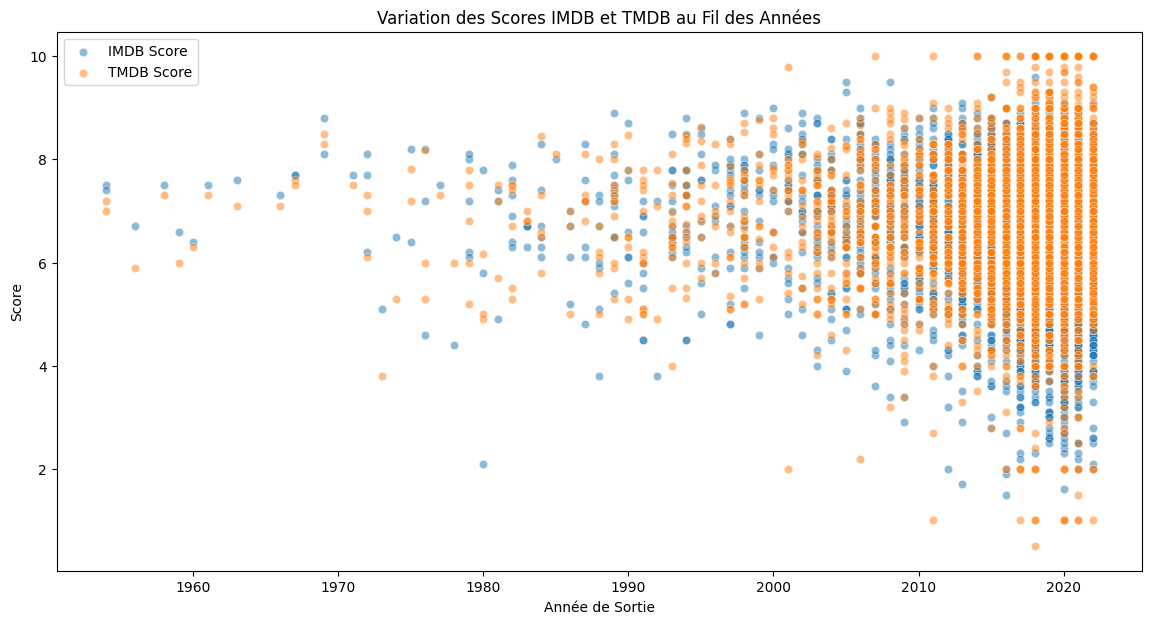

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que les données sont chargées et que la colonne 'release_year' est de type int
# df_titles = pd.read_csv('chemin_vers_titles.csv')

plt.figure(figsize=(14, 7))

# Score IMDB au fil des années
sns.scatterplot(data=df_titles, x='release_year', y='imdb_score', alpha=0.5, label='IMDB Score')

# Score TMDB au fil des années
sns.scatterplot(data=df_titles, x='release_year', y='tmdb_score', alpha=0.5, label='TMDB Score')

plt.title('Variation des Scores IMDB et TMDB au Fil des Années')
plt.xlabel('Année de Sortie')
plt.ylabel('Score')
plt.legend()
plt.show()


# Observations 

On peut observer que les scores TMDB semblent plus concentrés vers les valeurs élevées, surtout après 2000, ce qui pourrait être dû à la façon dont les scores sont attribués sur la plateforme TMDB ou à un biais vers les titres plus récents et populaires. Les scores IMDB semblent avoir une plus grande variabilité et une tendance à rester relativement stables au fil du temps.

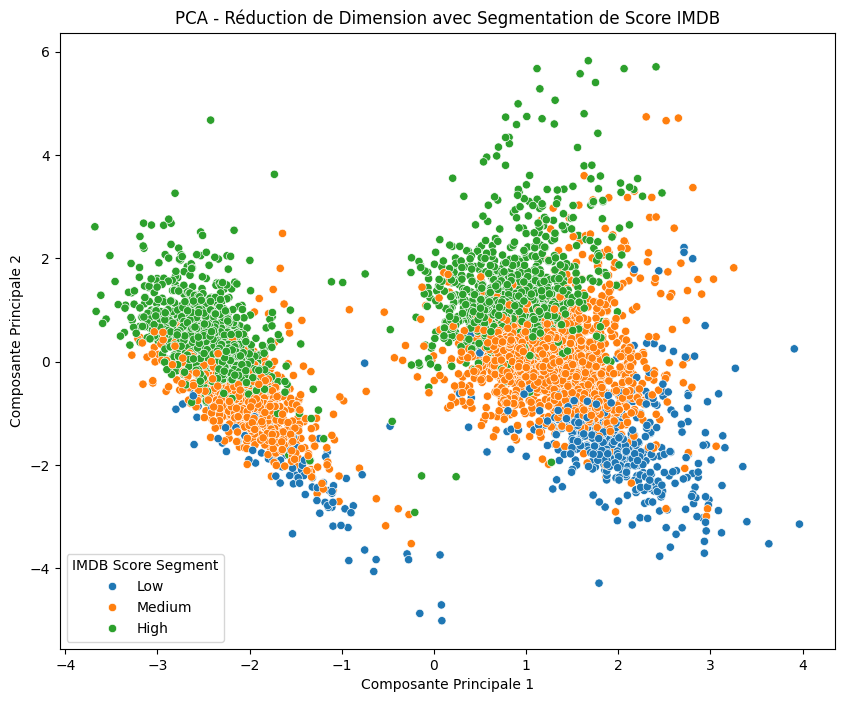

In [61]:
# Supposons que pca_data contient vos données PCA
# Ajoutez une colonne de score segmenté à vos données
score_labels = pd.cut(df_titles['imdb_score'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Visualisation PCA avec des couleurs pour chaque segment de score
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=score_labels)
plt.title('PCA - Réduction de Dimension avec Segmentation de Score IMDB')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='IMDB Score Segment')
plt.show()


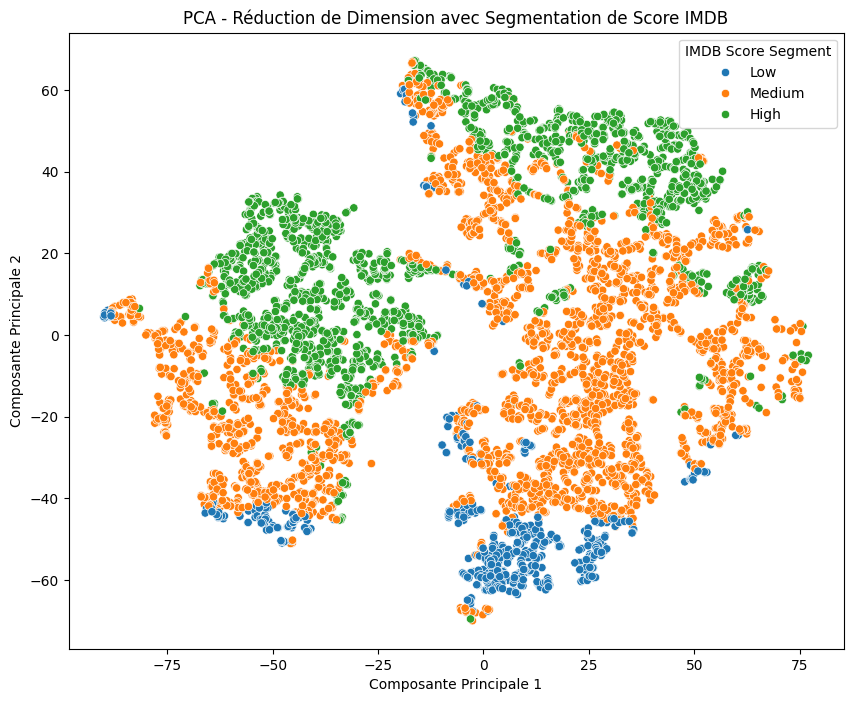

In [63]:
# Supposons que pca_data contient vos données PCA
# Ajoutez une colonne de score segmenté à vos données
score_labels = pd.cut(df_titles['imdb_score'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Visualisation PCA avec des couleurs pour chaque segment de score
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=score_labels)
plt.title('PCA - Réduction de Dimension avec Segmentation de Score IMDB')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='IMDB Score Segment')
plt.show()


In [62]:
# Ajout des valeurs de PC2 à vos données
df_titles['PC2'] = pca_data[:, 1]

# Tri des données par PC2 et affichage des titres extrêmes
extreme_titles = df_titles.sort_values(by='PC2', ascending=False).head(10)  # 10 titres les plus élevés sur PC2
print(extreme_titles[['title', 'release_year', 'imdb_score', 'tmdb_score']])


                     title  release_year  imdb_score  tmdb_score
13         White Christmas          1954         7.5       7.200
20  Saladin the Victorious          1963         7.6       7.100
18                The Land          1969         8.1       8.500
10    The Guns of Navarone          1961         7.5       7.300
22         The Blazing Sun          1954         7.4       7.000
4          The Dirty Dozen          1967         7.7       7.600
14           Cairo Station          1958         7.5       7.300
8         Bonnie and Clyde          1967         7.7       7.500
1              Taxi Driver          1976         8.2       8.179
11       The Professionals          1966         7.3       7.100


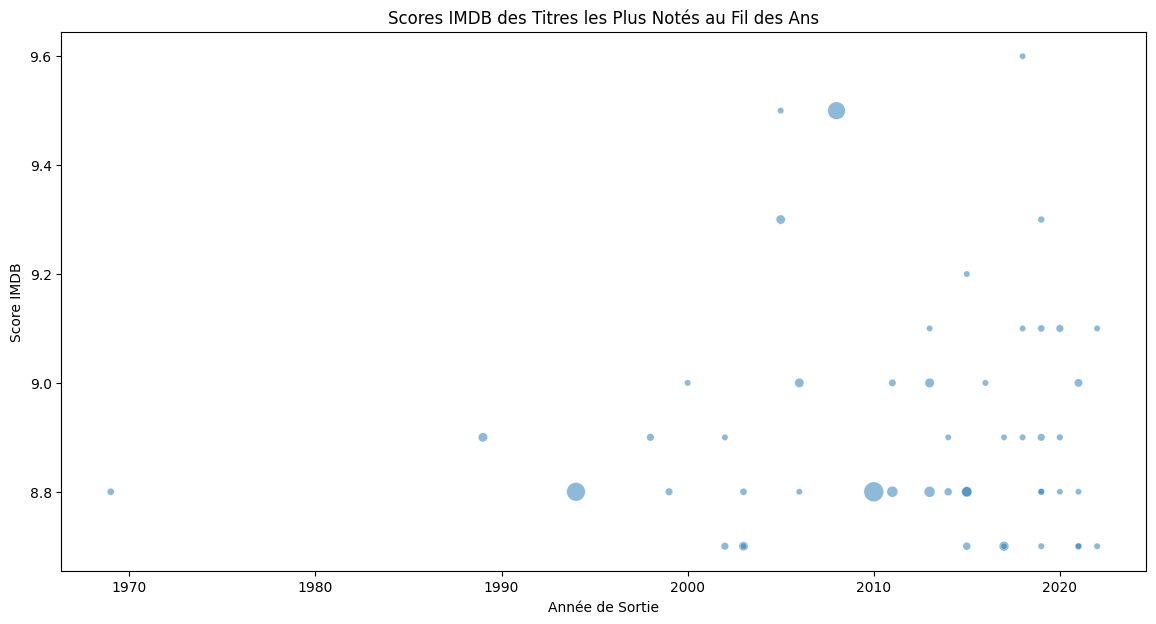

In [65]:
# Exemple de graphique pour les titres extrêmes avec année et score
plt.figure(figsize=(14, 7))

# Vous pourriez utiliser un graphique à bulles où la taille de chaque point est proportionnelle au nombre de votes
# Assurez-vous que 'imdb_votes' est converti en une échelle appropriée pour la taille des points
sns.scatterplot(x='release_year', y='imdb_score', size='imdb_votes', sizes=(20, 200),
                data=df_titles.sort_values(by='imdb_score', ascending=False).head(50),
                alpha=0.5, legend=False)

plt.title('Scores IMDB des Titres les Plus Notés au Fil des Ans')
plt.xlabel('Année de Sortie')
plt.ylabel('Score IMDB')
plt.show()


# Observations

La liste des titres que vous avez fournie montre les films qui ont les scores les plus élevés sur PC2. Ces titres sont généralement plus anciens (principalement des années 1950 à 1970) et ont des scores IMDB relativement élevés. Cela suggère que PC2 pourrait en effet capturer des éléments de qualité ou de popularité perçue qui sont communs à ces films classiques.

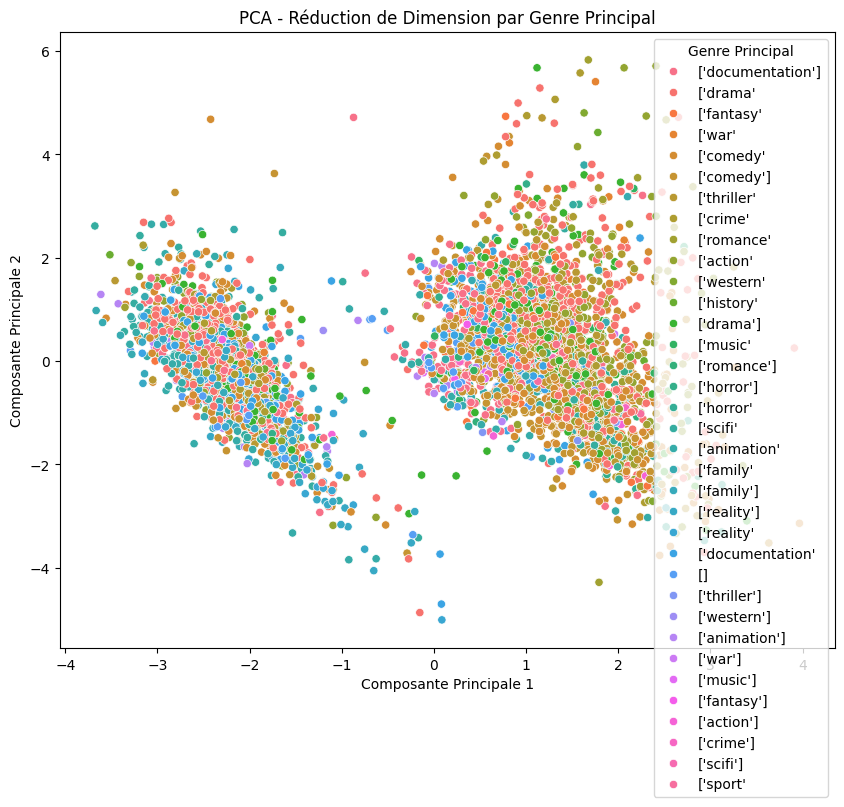

In [64]:
# Exemple de segmentation par genre (vous devrez adapter cette partie en fonction de la structure de vos données)
# Supposons que 'genres' est une colonne de type list ou string séparée par des virgules
df_titles['main_genre'] = df_titles['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')

# Maintenant, vous pouvez visualiser le graphique PCA avec les genres
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_titles['main_genre'])
plt.title('PCA - Réduction de Dimension par Genre Principal')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='Genre Principal')
plt.show()


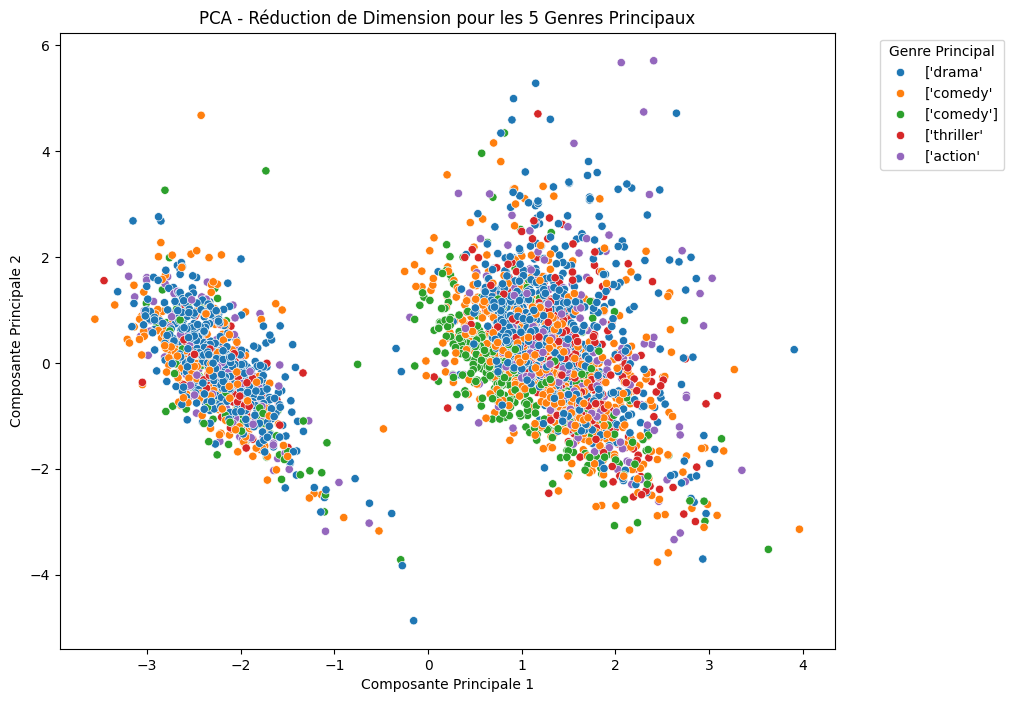

In [68]:
# Calculez la fréquence des genres et prenez les 5 genres les plus courants
top_genres = df_titles['main_genre'].value_counts().head(5).index.tolist()

# Filtrez vos données pour inclure uniquement les titres qui ont un genre dans les 5 genres les plus courants
top_genres_data = df_titles[df_titles['main_genre'].isin(top_genres)]

# Visualisation PCA pour les 5 genres les plus courants
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[top_genres_data.index, 0], y=pca_data[top_genres_data.index, 1], hue=top_genres_data['main_genre'])
plt.title('PCA - Réduction de Dimension pour les 5 Genres Principaux')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='Genre Principal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


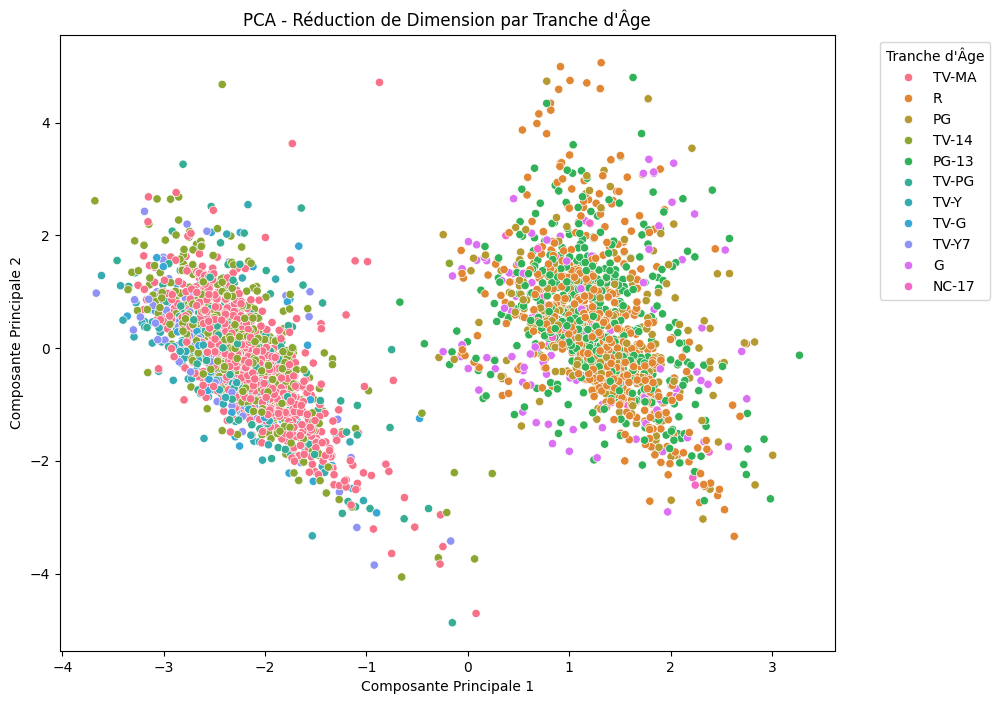

In [66]:
# Assurez-vous que vos données sont chargées et préparées
# titles_data = pd.read_csv('chemin_vers_titles.csv')

# Nous allons supposer que la colonne 'age_certification' contient les tranches d'âge
# Si nécessaire, nettoyez ou transformez les données de la tranche d'âge avant la visualisation

# Visualisation PCA avec les tranches d'âge
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_titles['age_certification'])
plt.title('PCA - Réduction de Dimension par Tranche d\'Âge')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='Tranche d\'Âge', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
